# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [64]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt



In [75]:
def load_data(fn_subject, fn_x, fn_export):

  df_features = pd.read_csv('features.txt', delimiter='\s+', header=None)
  df_subject = pd.read_csv(fn_subject, delimiter='\s+', header=None)
  df_x = pd.read_csv(fn_x, delimiter='\s+', header=None)

  df_x.columns = df_features[1]
  df_x = df_x[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
  df_x['subject_id'] = df_subject[0]

  df_x = df_x.reset_index()
  df_x = df_x.set_index(['index', 'subject_id'])
  df_x.to_csv(fn_export)

  return df_x

df_x_train = load_data('subject_train.txt', 'X_train.txt', 'df_x_train.csv')
df_y_train = pd.read_csv('y_train.txt', delimiter='\s+', header=None)

df_x_test = load_data('subject_test.txt', 'X_test.txt', 'df_x_test.csv')
df_y_test = pd.read_csv('y_test.txt', delimiter='\s+', header=None)


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [76]:
df_x_train.head()

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
index,subject_id,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362


In [77]:
df_x_train.isna().sum()

1
tBodyAcc-mean()-X    0
tBodyAcc-mean()-Y    0
tBodyAcc-mean()-Z    0
dtype: int64

In [80]:
#as variáveis que compões o índice (no caso, número da linha e subject_id) não são levadas em contas pelos métodos da árvore, certo?

clf_cc_alpha = DecisionTreeClassifier(random_state=1000, min_samples_leaf=20)
path = clf_cc_alpha.cost_complexity_pruning_path(df_x_train, df_y_train)
ccp_alphas = path.ccp_alphas

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [81]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(df_x_train, df_y_train)
    clfs.append(clf)

In [82]:
train_scores = [clf.score(df_x_train, df_y_train) for clf in clfs]
test_scores  = [clf.score(df_x_test, df_y_test) for clf in clfs]

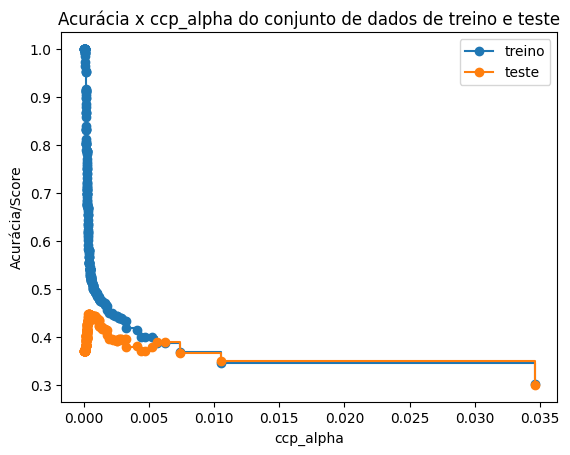

In [83]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("Acurácia/Score")
ax.set_title("Acurácia x ccp_alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

In [101]:
#pegar arvore com maior score com maior ccp_alpha (caso haja empate no score)

#porém, este código abaixo inverte a lista de scores e acha o índice do primeiro score mais alto
#nada garante que o primeiro score é o que tem o ccp_alpha maior, porque a lista de ccp_alphas não é ordenada
#rever

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

In [102]:
#maior acurácia
max(test_scores)

0.4472344757380387

In [97]:
teste_algoritmo = [1, 0, 2, 2, 0]
max(teste_algoritmo)

2

In [98]:
teste_algoritmo[::-1]

[0, 2, 2, 0, 1]

In [99]:
teste_algoritmo.index(2)

2

In [100]:
teste_algoritmo[::-1].index(2)
# é o indice 1 de trás pra frente, logo o penúltimo item

1